

# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> The investigation will be performed on TMDB movie dataset which was gathered and cleaned originally by Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, genre, cast, director and revenue.


**Notes:**
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Questions
*  Which genres are most popular from year to year?
*  What is the movie that has the highest profit?
*  What is the movie that has the lowest profit?
*  Top ten movies which have the highest profit
*  Can the inflation affect the result of top 10 movies
* What is the relation between profit and the popularity?
* What is the relation between the runtime and the budget?
* Number of movies released over years?
* Which genre has the highest number of movies?
* Which genre of movies has the highest popularity?
* Are movies with higher budget receive better ratings?
* Which type movies with the highest popularity long movies or short movies?
* Which genre has the highest profit?
* Top 10 directors with the highest profit?
* Directors with the highest number of movies?
* The production companies with the highest profit?
* The most frequent movie star/s?
* What is the best release month?
* Which year had the highest profit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape

(10866, 21)

* Number of movies= 10866
* Number of columns= 21

In [5]:
#some info on the dataset to get the name and datatype of each column, number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
#number of duplicated rows
df.duplicated().sum()

1

In [8]:
#total number of missing data
df.isnull().sum().sum()

13434

In [9]:
#number of rows with missing data
df.isnull().any(axis=1).sum()

8874

In [10]:
#number of missing data in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
#dataset summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df['budget']

0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
           ...    
10861            0
10862            0
10863            0
10864            0
10865        19000
Name: budget, Length: 10866, dtype: int64

### Observation:
* There is a number of missing data
* There is 1 duplicate row
* Some columns such as budget and revenue have 0 values
* Columns like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* Release_date column is an object

### Data Cleaning
**Steps:**
* Drop duplicate rows
* Drop columns which are not required for data processing
* Drop rows of 0 values in budget and revenue columns
* Fill the missing data with relevant values
* Use the cast column to extract and create a new column named leading_actor
* Use the genres column to extract and create a new column named genre
* Change the release_date column to datetime format
* Extract the month from released_date column and create released_month column
* Create profit column from budget and revenue columns
* Create profit_adj from budjet_adj and revenue_adj to check if the inflation has any effect on the data set analysis

**1. Drop duplicate rows**

In [4]:
#drop duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**2. Drop columns which are not required for data processing**

In [7]:
#drop some unuseful columns which are not required for the analysis
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [8]:
#number of columns
df.shape

(10865, 16)

**3. Drop rows of 0 values in budget and revenue columns**
> Some values of budget and revenue columns have 0 values it could be resulted from lack of information or gathering error, it is more convenient to drop these data since it can lead to wrong conclusions.

In [9]:
#number of revenue with 0 values
df_revenue= df.query('revenue == 0')
print(f"Number of 0 values in revenue column= {df_revenue.shape[0]}")

Number of 0 values in revenue column= 6016


In [10]:
#Drop rows of 0 values in revenue columns
df.drop(df_revenue.index, inplace=True)
df.shape

(4849, 16)

In [11]:
#number of budget with 0 values after dropping the 0 revenues rows
df_budget= df.query('budget == 0')
print(f"Number of 0 values in budget column= {df.query('budget == 0').shape[0]}")

Number of 0 values in budget column= 995


In [12]:
#drop rows of 0 values in buget column
df.drop(df_budget.index, inplace=True)
df.shape

(3854, 16)

**4.Fill the missing data with relevant values**

In [13]:
df.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [14]:
#Fill the missing data in cast column
df['cast']= df['cast'].fillna('Unknown Cast')

In [15]:
df['cast'].isnull().sum()

0

In [16]:
#Fill the missing data in director column
df['director']= df['director'].fillna('Unknown Director')
df['director'].isnull().sum()

0

In [17]:
#Fill the missing data in production_companies column
df['production_companies']= df['production_companies'].fillna('Unknown Production Companies')
df['production_companies'].isnull().sum()

0

**5. Use the cast column to extract and create a new column named leading_actor**

In [18]:
name= df['cast'].str.split(pat="|", n=1, expand=True)
df['leading_actor']= name[0]
df['leading_actor']

0             Chris Pratt
1               Tom Hardy
2        Shailene Woodley
3           Harrison Ford
4              Vin Diesel
               ...       
10822    Elizabeth Taylor
10828         Paul Newman
10829          John Wayne
10835       Steve McQueen
10848        Stephen Boyd
Name: leading_actor, Length: 3854, dtype: object

**6. Use the genres column to extract and create a new column named genre** 

In [19]:
genre= df['genres'].str.split(pat="|", n=1, expand=True)
df['genre']= genre[0]
df['genre']

0           Action
1           Action
2        Adventure
3           Action
4           Action
           ...    
10822        Drama
10828      Mystery
10829       Action
10835       Action
10848    Adventure
Name: genre, Length: 3854, dtype: object

**7. Use the director column to extract first director and create a new column called director_name**

In [20]:
director= df['director'].str.split(pat="|", n=1, expand=True)
df['director_name']= director[0]
df['director_name']

0          Colin Trevorrow
1            George Miller
2         Robert Schwentke
3              J.J. Abrams
4                James Wan
               ...        
10822         Mike Nichols
10828     Alfred Hitchcock
10829         Howard Hawks
10835          Robert Wise
10848    Richard Fleischer
Name: director_name, Length: 3854, dtype: object

**8. Use the production_companies column to create production_company column**

In [21]:
production= df['production_companies'].str.split(pat="|", n=1, expand=True)
df['production_company']= production[0]
df['production_company']

0                             Universal Studios
1                     Village Roadshow Pictures
2                          Summit Entertainment
3                                     Lucasfilm
4                            Universal Pictures
                          ...                  
10822                      Chenault Productions
10828                        Universal Pictures
10829                        Paramount Pictures
10835    Twentieth Century Fox Film Corporation
10848    Twentieth Century Fox Film Corporation
Name: production_company, Length: 3854, dtype: object

**9.Change the release_date column to datetime format**

In [22]:
df['release_date']= pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   2066-06-21
10828   2066-07-13
10829   2066-12-17
10835   2066-12-20
10848   2066-08-24
Name: release_date, Length: 3854, dtype: datetime64[ns]

In [23]:
#extract month from released_date and create released_month column
df['release_month']= df['release_date'].dt.month_name()
df['release_month']

0            June
1             May
2           March
3        December
4           April
           ...   
10822        June
10828        July
10829    December
10835    December
10848      August
Name: release_month, Length: 3854, dtype: object

**10. create profit& profit_adj columns**

In [24]:
#create profit column
df['profit']= df['revenue']- df['budget']

In [25]:
#create profit_adj column
df['profit_adj']= df['revenue_adj']- df['budget_adj']

In [26]:
df.shape

(3854, 23)

In [27]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'leading_actor', 'genre', 'director_name',
       'production_company', 'release_month', 'profit', 'profit_adj'],
      dtype='object')

In [28]:
#drop unuseful columns:
df.drop(['cast', 'director', 'genres', 'production_companies'], axis=1, inplace=True)

In [29]:
df.to_csv('cleaned_data.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: Which genres are most popular from year to year?

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
data= df.groupby(['release_year','genre'], as_index=False)['popularity'].mean()
data.head()

,release_year,genre,popularity
0,1960,Action,1.504538
1,1960,Comedy,0.501564
2,1960,Drama,2.610362
3,1961,Action,0.754548
4,1961,Adventure,2.631987


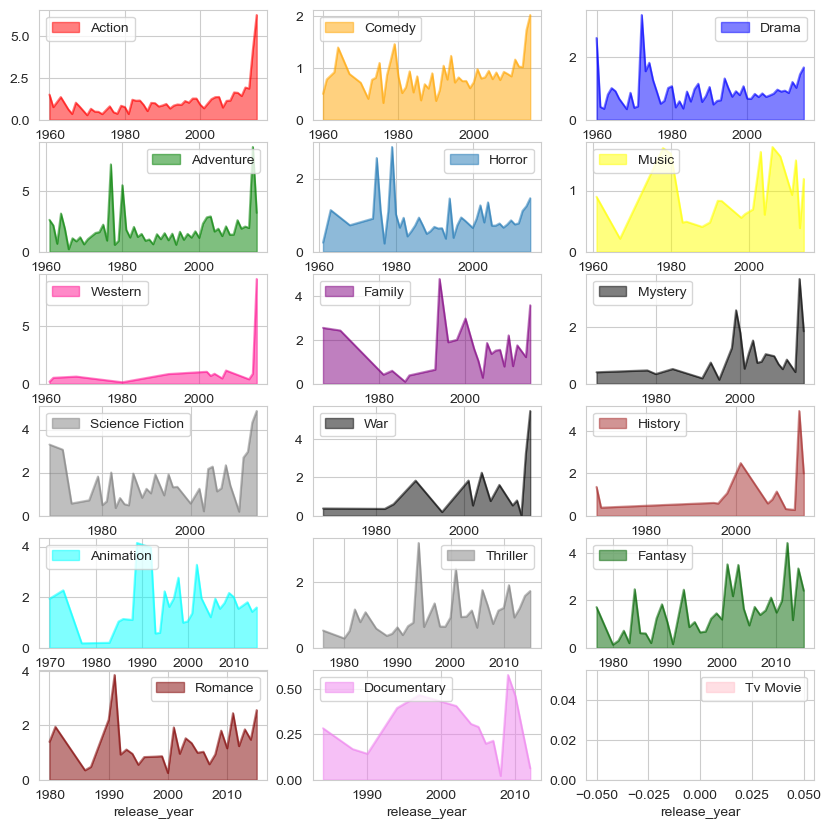

In [31]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(6,3, figsize=(10,10))
data.query('genre == "Action"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Action", color= "red", ax=axs[0][0]);
data.query('genre == "Comedy"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Comedy", color= "orange",ax=axs[0][1]);
data.query('genre == "Drama"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Drama", color= "blue", ax=axs[0][2]);
data.query('genre == "Adventure"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Adventure", color= "green", ax=axs[1][0]);
data.query('genre == "Horror"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Horror", ax=axs[1][1]);
data.query('genre == "Music"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Music", color= "yellow", ax=axs[1][2]);
data.query('genre == "Western"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Western", color= "deeppink", ax=axs[2][0]);
data.query('genre == "Family"').plot(kind='area',stacked=False, x='release_year', y='popularity', label="Family", color= "purple", ax=axs[2][1]);
data.query('genre == "Mystery"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Mystery", color= "black", ax=axs[2][2]);
data.query('genre == "Science Fiction"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Science Fiction", color= "gray", ax=axs[3][0]);
data.query('genre == "War"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="War", color= "black", ax=axs[3][1]);
data.query('genre == "History"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="History", color= "brown", ax=axs[3][2]);
data.query('genre == "Animation"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Animation", color= "cyan", ax=axs[4][0]);
data.query('genre == "Thriller"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Thriller", color= "gray", ax=axs[4][1]);
data.query('genre == "Fantasy"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Fantasy", color= "darkgreen", ax=axs[4][2]);
data.query('genre == "Romance"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Romance", color= "maroon", ax=axs[5][0]);
data.query('genre == "Documentary"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Documentary", color= "violet", ax=axs[5][1]);
data.query('genre == "Tv Movie"').plot(kind='area',stacked=False,x='release_year', y='popularity', label="Tv Movie", color= "pink", ax=axs[5][2]);

> **The above chart give an indication on each genre popularity along the years**
> We can deduce some conclusions:
* Action movies production were very weak in early years then by the begining of 21 st century it increased gradualy may be due to the technological improvement which improved the filmmaking production
* Comedy movies have a stable popularity along the years
* Drama movies were very popular around the 60's and the 70's than it kept a stable rate
* Adventure movies was popular around the 80's than it has stable rate and was popular again after the year 2000
* we can compare between the horror and thriller movies abviously they are slightly different horror movies were polpular around the 80's but the thriller were popular between the 90's and the 2000
* Family movies were very popular in early years but it rech the highest popularity between the 90's and 2000 but than it has a slight decrease
* Science fiction nd fantasy movies chart are slightly similar they both were very popular around the year 2000
* Animation movies was very popular in the 70's but it's popularity decreases ant until the 90's it became popular again it it kept a high popularity till 2010
* Documentary movies aren't very popular but it has a slight increase at the 90's.
* romance were very popular around the 90's and musical movies had its highest popularity around the late 60' and in 2001
* War, History and western movies also have its ups and downs around the years.


### Question 2: What is the movie that has the highest profit?

In [32]:
max_profit= df['profit'].max()
max_profit
df[df['profit']== max_profit]

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor,genre,director_name,production_company,release_month,profit,profit_adj
1386,19995,9.432768,237000000,2781505847,Avatar,162,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington,Action,James Cameron,Ingenious Film Partners,December,2544505847,2.586237e+09


> **Avatar is the movie with the highest profit**

### Question3: What is the movie with the lowest profit?

In [33]:
min_profit=df['profit'].min()
df[df['profit']==min_profit]

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor,genre,director_name,production_company,release_month,profit,profit_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,100,2010-12-02,74,6.4,2010,425000000.0,11087569.0,Kate Bosworth,Adventure,Sngmoo Lee,Boram Entertainment Inc.,December,-413912431,-413912431.0


> **The Warrior's Way is the movie with the lowest profit**

### Question 4: Top ten movies which have the highest profit

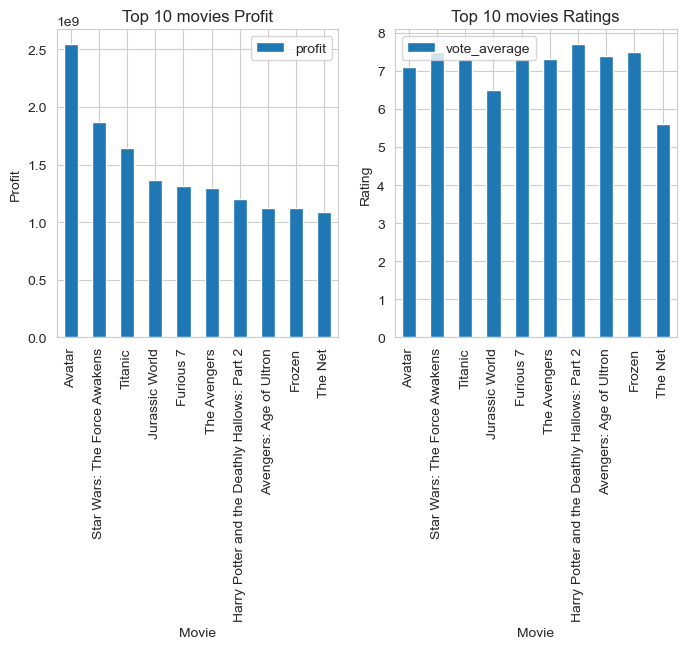

In [34]:
df_sorted= df.sort_values(by=['profit'], ascending=False)
top10_df=df_sorted.head(10)
fig, axs = plt.subplots(1,2, figsize=(8,4))
top10_df.plot(x='original_title', y='profit', kind='bar', title='Top 10 movies Profit', xlabel='Movie', ylabel='Profit', ax=axs[0]);
top10_df.plot(x='original_title', y='vote_average', kind='bar', title='Top 10 movies Ratings', xlabel='Movie', ylabel='Rating', ax=axs[1]);

> **Top 10 Movies are:**
1. Avatar
2. Star Wars: The Force Awakens	
3. Titanic
4. Jurassic World
5. Furious 7	
6. The Avengers	
7. Harry Potter and the Deathly Hallows: Part 2
8. Avengers: Age of Ultron
9. Frozen
10. The Net 

### Question5: Can the inflation affect the result of top 10 movies?

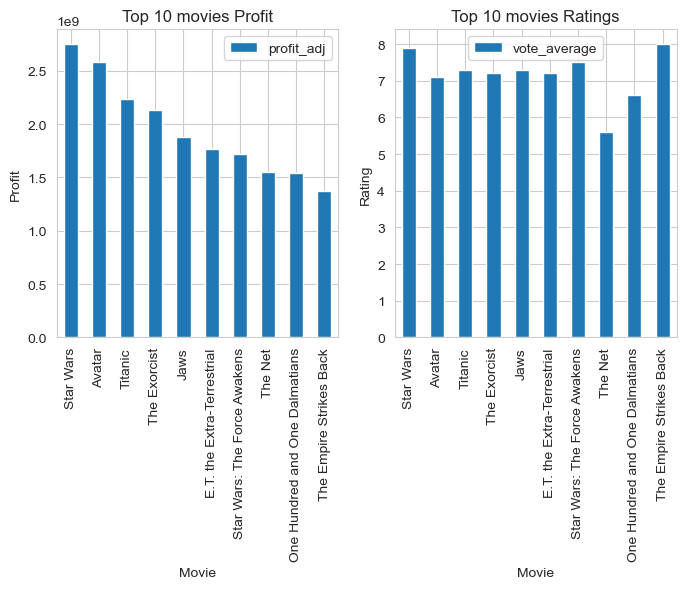

In [35]:
df_sorted= df.sort_values(by=['profit_adj'], ascending=False)
top10_df=df_sorted.head(10)
fig, axs = plt.subplots(1,2, figsize=(8,4))
top10_df.plot(x='original_title', y='profit_adj', kind='bar', title='Top 10 movies Profit', xlabel='Movie', ylabel='Profit', ax=axs[0]);
top10_df.plot(x='original_title', y='vote_average', kind='bar', title='Top 10 movies Ratings', xlabel='Movie', ylabel='Rating', ax=axs[1]);

> **The inflation have a great impact on the result it produce a whole new list of top movies through years and hence it is the more accurate list**


**Top 10 movies of all times**
1. Star Wars	
2. Avatar
3. Titanic
4. The Exorcist	
5. Jaws
6. E.T. the Extra-Terrestrial	
7. Star Wars: The Force Awakens	
8. The Net	
9. One Hundred and One Dalmatians	
10. The Empire Strikes Back	

### Question 6: What is the relation between profit and the popularity?

In [36]:
def label(x, y, z):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()

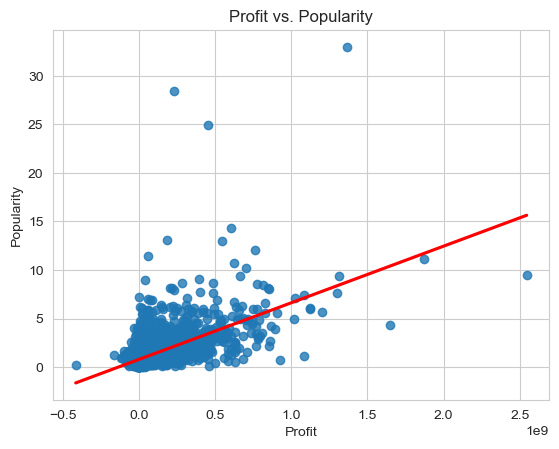

correlation coefficient r = 0.5962013674920572


In [37]:
from scipy import stats
sns.regplot(x="profit", y="popularity", ci=None, line_kws={"color": "red"}, data=df)
label('Profit', 'Popularity', 'Profit vs. Popularity');
correlation= stats.pearsonr(df['popularity'], df['profit'])
print(f"correlation coefficient r = {correlation[0]}")

**From the scatter plot above we can conclude that there is a positive correlation between the two varaibles with correlation coefficient= 0.596** 

### Question 7: What is the relation between the runtime and the budget?

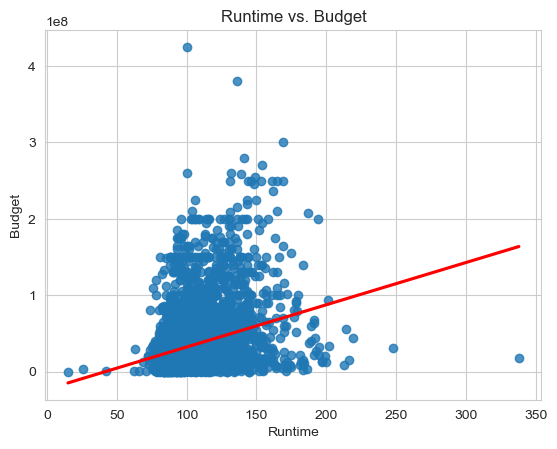

correlation coefficient r = 0.260977101404115


In [38]:
sns.regplot(x="runtime", y="budget", ci=None, line_kws={"color": "red"}, data=df)
label('Runtime', 'Budget', 'Runtime vs. Budget');
correlation= stats.pearsonr(df['runtime'], df['budget'])
print(f"correlation coefficient r = {correlation[0]}")

**From the scatter plot above we can conclude that there is a positive correlation between the two varaibles with correlatiion coefficient r = 0.26**

### Question8: Number of movies released over years?

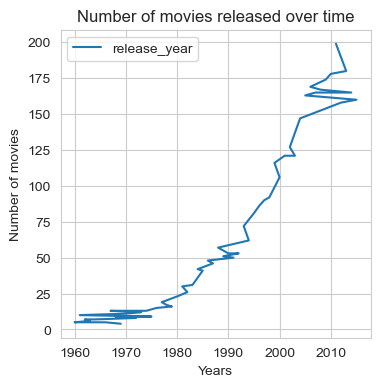

In [39]:
df['release_year'].value_counts().plot(figsize=(4,4), legend=True)
label('Years', 'Number of movies', 'Number of movies released over time');

**From the line plot above we can conclude that the number of released movies increased overtime.**

### Qiestion 9: Which genre has the highest number of movies?

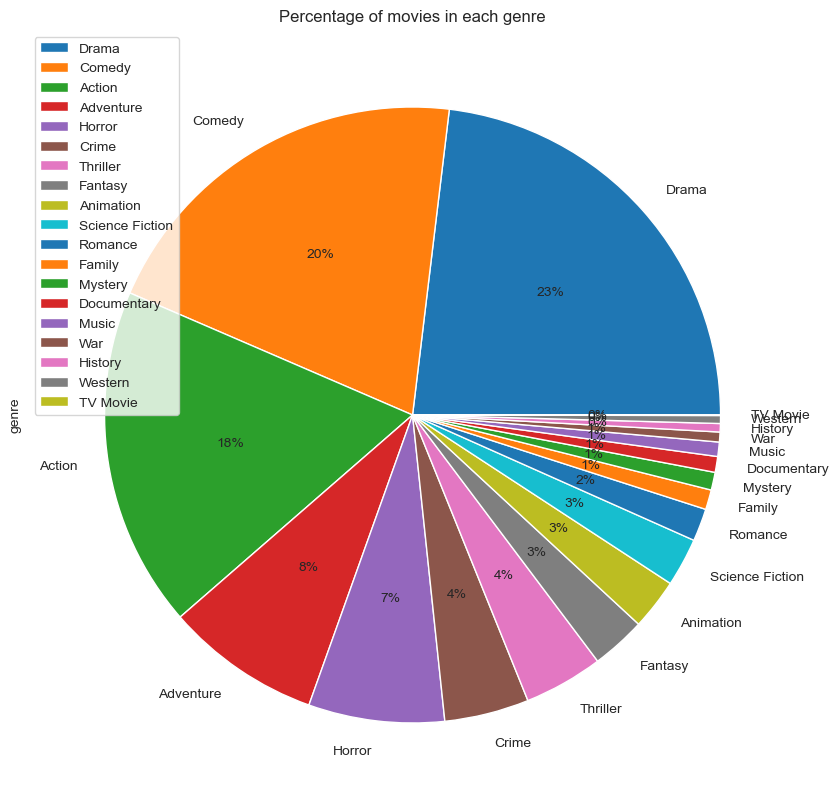

In [45]:
df['genre'].value_counts().plot(kind='pie',autopct='%1.0f%%', title='Percentage of movies in each genre', figsize=(10,10))
plt.legend(loc='upper left');


**From the above bar chart we can deduce that drama movies are the most frequent type of movies after that comes the comedy and action movies.**

### Question 10: Which genre of movies has the highest popularity?

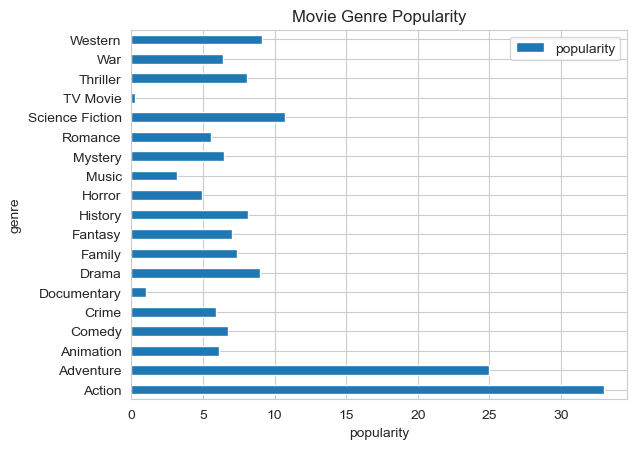

In [46]:
data= df.groupby(['genre'])['popularity'].max()
data.plot(kind='barh', legend=True)
label('popularity', 'genre', 'Movie Genre Popularity')

**From the bar chart above we can conclude that action and adventure movies are the most popular genre of movies.**

### Question 11: Are movies with higher budget receive better ratings?

In [47]:
budget_median= df['budget_adj'].median()
budget_median
low_budget= df.query('budget_adj< 30016111.9054567')
high_budget= df.query('budget_adj>= 30016111.9054567')
(low_budget.vote_average.mean(), high_budget.vote_average.mean())

(6.176336274001043, 6.159989621172817)

**There is no significant effect of the movie budget on the movie rating**

### Question 12: What kinds of properties are associated with movies that have high profit?
**Based on scatterplots of profit_adj against different feature variables, which of the following is most likely to have a positive impact on movie success.**
> here I am going to use the profit_adj to put the inflation in consideration

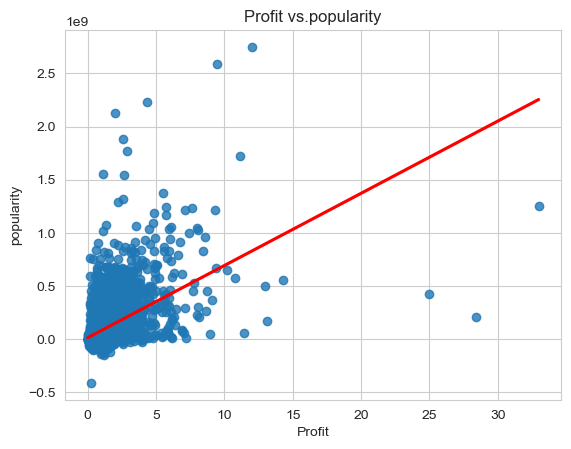

correlation coefficient r = 0.5168676135448649


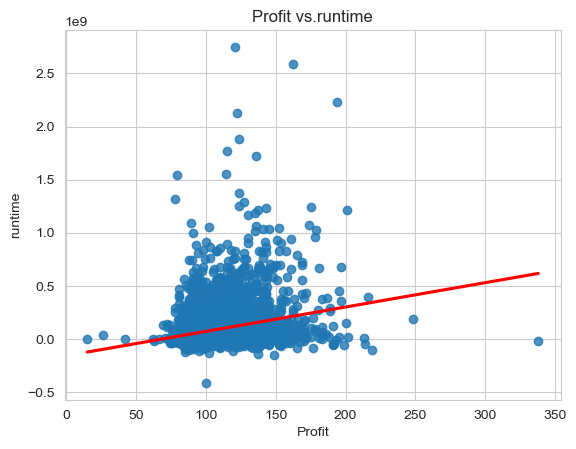

correlation coefficient r = 0.2352486623487593


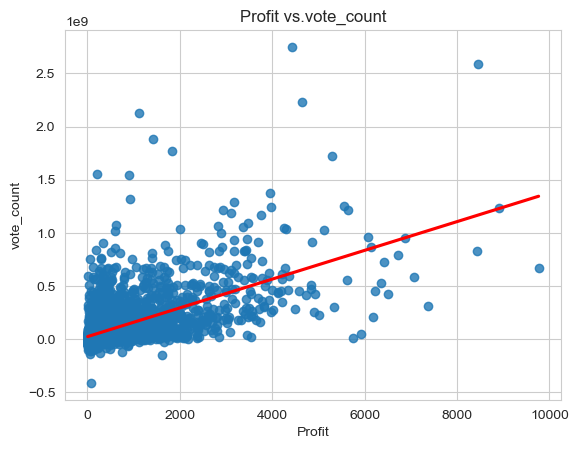

correlation coefficient r = 0.6140617673945263


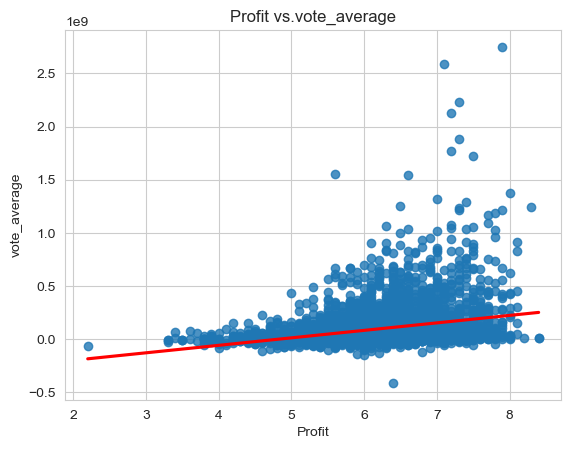

correlation coefficient r = 0.2886514955484547


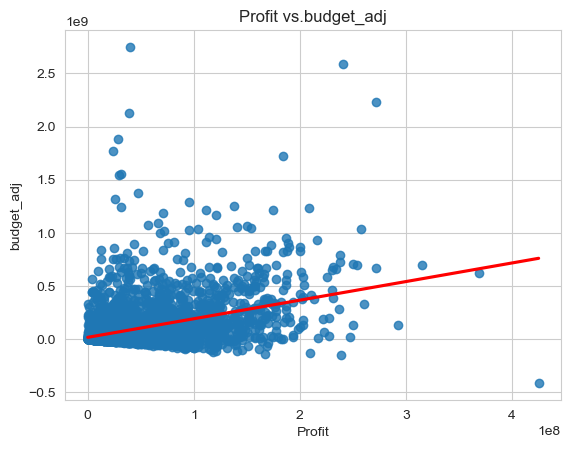

correlation coefficient r = 0.4043442907401166


In [48]:
columns=['popularity', 'runtime', 'vote_count', 'vote_average', 'budget_adj']
for column in columns: 
    sns.regplot(x=column, y= "profit_adj", ci=None, line_kws={"color": "red"}, data=df)
    label('Profit', column, 'Profit vs.'+ column);
    correlation= stats.pearsonr(df['profit_adj'], df[column])
    print(f"correlation coefficient r = {correlation[0]}")

**From the above scatter plots the properties that has a positive effect on the profit are the budget and the runtime.**

### Question13: Which type movies with the highest popularity long movies or short movies?
>The Academy of Motion Picture Arts and Sciences defines a short film as "an original motion picture that has a running time of 40 minutes or less, including all credits".
[Link Here](https://en.wikipedia.org/wiki/Short_film)

In [49]:
short_movies=df.query('runtime <= 40')
extremly_long_movies= df.query('runtime > 106')
long_movies=df.query('runtime > 40 & runtime<=106')

In [50]:
(df['runtime'].max(), df['runtime'].min())

(338, 15)

In [51]:
df['runtime'].median()

106.0

In [52]:
bin_edges =[15, 40, 106, 338]
bin_names= ['Short Movie', 'Long Movie', 'Extremly Long Movie']
df['movie_type']= pd.cut(df['runtime'], bin_edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor,genre,director_name,production_company,release_month,profit,profit_adj,movie_type
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Colin Trevorrow,Universal Studios,June,1363528810,1.254446e+09,Extremly Long Movie
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,George Miller,Village Roadshow Pictures,May,228436354,2.101614e+08,Extremly Long Movie
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Robert Schwentke,Summit Entertainment,March,185238201,1.704191e+08,Extremly Long Movie
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,J.J. Abrams,Lucasfilm,December,1868178225,1.718723e+09,Extremly Long Movie
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,James Wan,Universal Pictures,April,1316249360,1.210949e+09,Extremly Long Movie


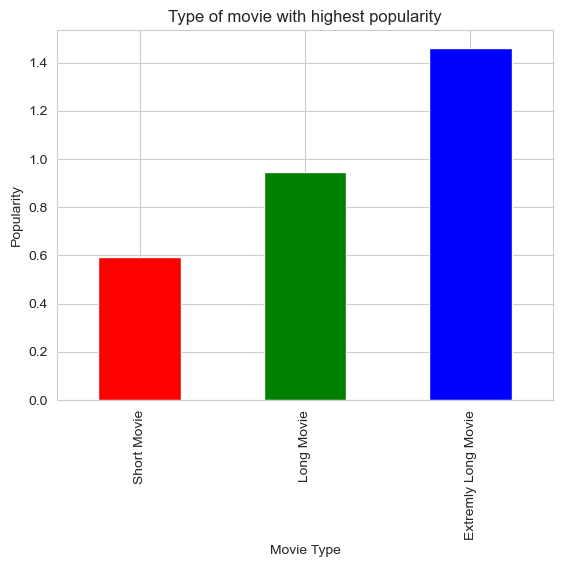

In [53]:
movie_type= df.groupby(['movie_type'])['popularity'].mean()
movie_type.plot(kind='bar', color=['red', 'green', 'blue'])
label('Movie Type', 'Popularity', 'Type of movie with highest popularity');

**The extremly long movies have the highest popularity among people and short movies are the least popular.**

### Question 14: Which genre has the highest profit?

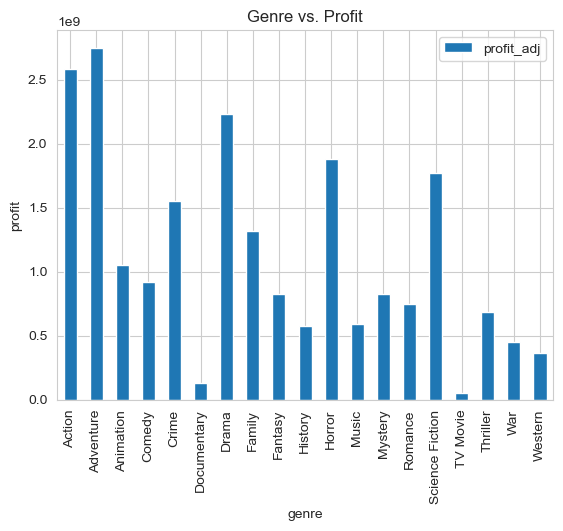

In [54]:
df.groupby(['genre'])['profit_adj'].max().plot(kind='bar', legend=True)
label('genre', 'profit', 'Genre vs. Profit');

**From the above bar chart the adventure movies are on the top with the highest profit than the action movies with small difference after that comes the drama movies followed by both the horror and sci fi movies.**

### Question 15: Top 10 directors with the highest profit?

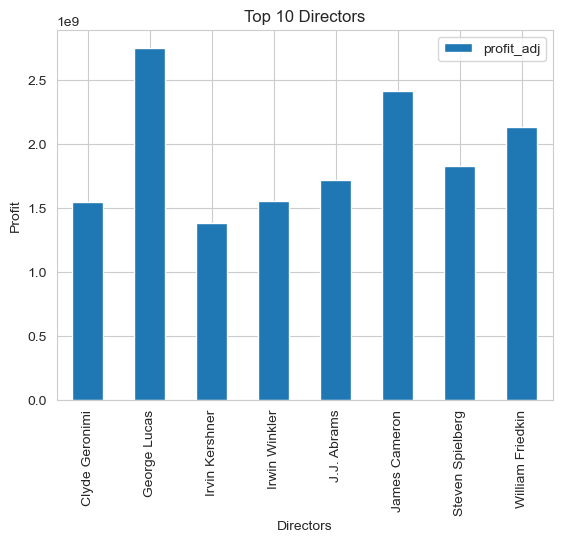

In [55]:
top10_df.groupby(['director_name'])['profit_adj'].mean().plot(kind='bar', legend=True)
label('Directors', 'Profit', 'Top 10 Directors')

**George Lucas is the director with the highest profit by directing Star Wars movie.**

### Question 16: Directors with the highest number of movies?

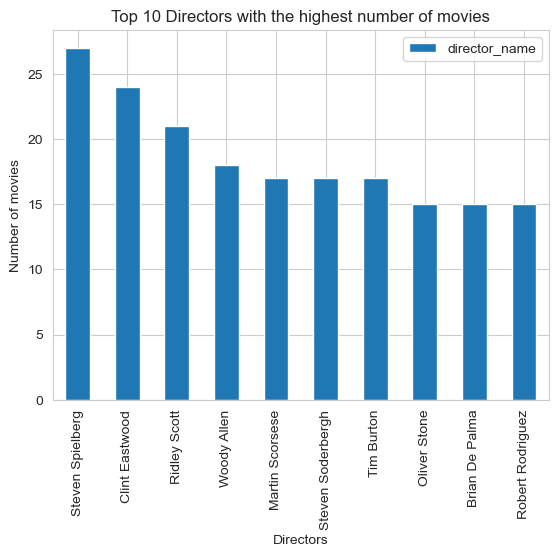

In [56]:
directors=df.director_name.value_counts()
directors.iloc[:10].plot(kind='bar', legend=True)
label('Directors', 'Number of movies', 'Top 10 Directors with the highest number of movies');

**Steven Spielberg is the most frequent director.**

### Question 17: The top production companies with the highest profit ?

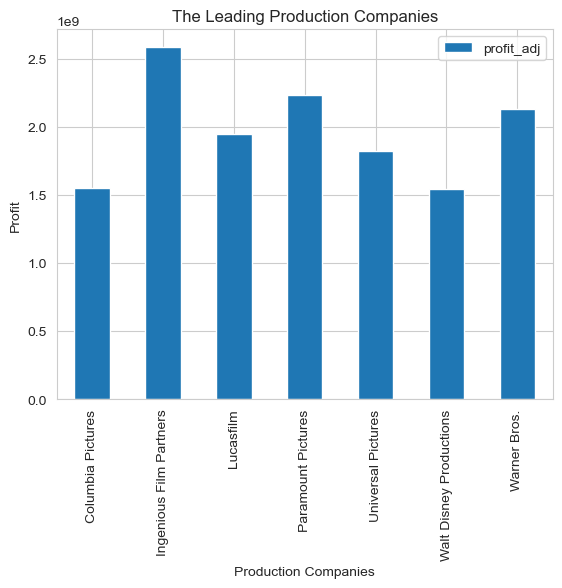

In [57]:
top10_df.groupby(['production_company'])['profit_adj'].mean().plot(kind='bar', legend=True)
label('Production Companies', 'Profit','The Leading Production Companies');

**The top 10 companies with the highest profit are shown above.** 	

### Question 18: The most frequent movie star/s?

In [58]:
df['leading_actor'].mode()

0    Nicolas Cage
Name: leading_actor, dtype: object

In [59]:
df.query('leading_actor == "Nicolas Cage"')['id'].count()

37

**The most frequent actor is Nicolas Cage with 37 movies.**

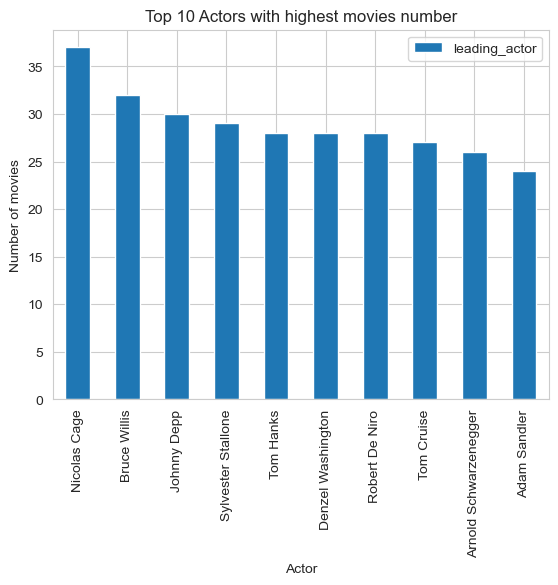

In [60]:
stars=df.leading_actor.value_counts()
stars.iloc[:10].plot(kind='bar', legend=True)
label("Actor", 'Number of movies', 'Top 10 Actors with highest movies number');

### Question 19: What is the best release month?

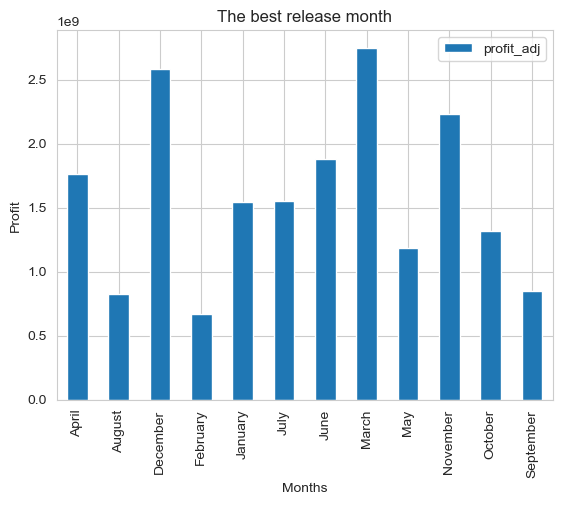

In [61]:
df.groupby(['release_month'])['profit_adj'].max().plot(kind='bar', legend=True)
label('Months', 'Profit', 'The best release month');

**The best release month with the highest profit is March followed by December with a slight difference.**

### Question 20: Which year had the highest profit?

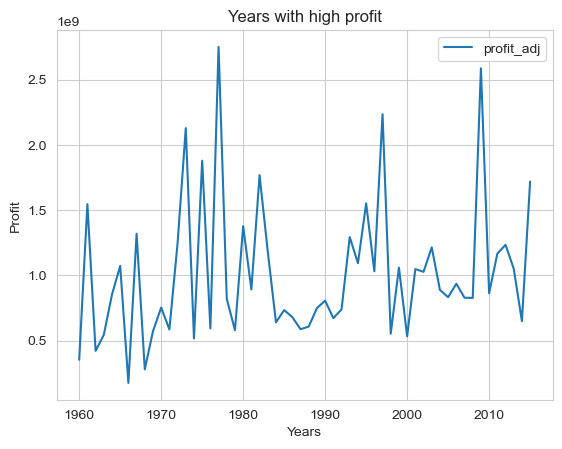

In [62]:
df.groupby(['release_year'])['profit_adj'].max().plot(legend=True)
label('Years', 'Profit', 'Years with high profit');

**From the above line chart it is very abvious that the years between the 70's and 80' had the highest profit.**

<a id='conclusions'></a>
## Conclusions

> **After the analysis of the TMDB dataset we can conclude:**
* The data was very useful to get some insights on filmmaking industry along the years. 
* The inflation have a great impact on the result so in the analysis i mostly used the profit considering the inflation which gave a better insights and more accurate results.
* Filmmaking industry had evolved over time and it can be deduced from the movie production and released over time
* Drama movies production has the highest rate followed by comedy and action movies.
* Although drama movies production is the dominant, action movies and adventure movies are the most popular movies and they have the highest profit.
* There are some characteristics associated with movies with the highest profit runtime and budget which show a slight positive effect on the profit, however there is no significant effect of the movie budget on the movie rating.
* Long movies are more popular than short movies
* George Lucas is the dirctor with the highest profit by directing the movie Star Wars but Steven Spielberg made the highest number of movies with 27 movies
* Production companies with highest profit are Ingenious Film Partners, Paramount Pictures, Universal Pictures and Warner Bros. 
* The actor with the highest number of movies is Nicolas Cage with 37 movies followed by Bruce Wills and Johnny Deep.
* The best release months are March and December with the highest profit.
* Higher budgets is correlated with higher profit movies.




**Limitations**
1. The data we have lack the suitable paramaters that we can use to predict the success of a movie.
2. A lot of missing important data in the budget, revenue, budget_adj, revenue_adj which might have lead to wrong conclusions.
3. Dropping missing data might lead to biased analysis
3. Although the formula worked but the poor data could cause some limitations in the analysis. 